In [1]:
#Installing Dependencies

!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 266kB 6.4MB/s 
     |████████████████████████████████| 2.0MB 6.6MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 1.4MB 39.6MB/s 
     |████████████████████████████████| 174kB 32.0MB/s 
     |████████████████████████████████| 112kB 36.1MB/s 
     |████████████████████████████████| 1.7MB 35.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.2MB 297kB/s 
     |████████████████████████████████| 6.8MB 51.3MB/s 
     |████████████████████████████████| 276kB 49.0MB/s 
     |████████████████████████████████| 245kB 54.1MB/s 
     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 163kB 51.7MB/s 
     |████████████████████████████████| 81kB 6.2MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
 

In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('fetched_data_v1.csv')
df['Price Date'] = pd.to_datetime(df['Price Date'])

In [3]:
df.drop('Sl. No',axis=1,inplace=True)
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,2020-01-01
1,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,2020-01-01
2,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,2020-01-01
3,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,2020-01-01
4,Agra,Khairagarh,Potato,Desi,FAQ,1200,1300,1250,2020-01-01


In [4]:
# Feature Outlook
for col in df.columns:
    print(col,df[col].nunique())

District Name 1
Market Name 8
Commodity 1
Variety 4
Grade 1
Min Price (Rs./Quintal) 153
Max Price (Rs./Quintal) 161
Modal Price (Rs./Quintal) 282
Price Date 334


In [6]:
# Feature Selection and New Feature Generation
irrelevant_cols = ['District Name','Commodity','Grade','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)']
features = ['Market Name','Variety','Price Date','Modal Price (Rs./Quintal)']
data = df[features]

data['Day'] = data['Price Date'].dt.day
data['Month'] = data['Price Date'].dt.month

data.drop('Price Date',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [7]:
data = pd.concat([data,pd.get_dummies(data['Market Name'], prefix='Market Name')],axis=1)
data = pd.concat([data,pd.get_dummies(data['Variety'], prefix='Variety')],axis=1)
data.head()

,Market Name,Variety,Modal Price (Rs./Quintal),Day,Month,Market Name_Achnera,Market Name_Agra,Market Name_Fatehabad,Market Name_Fatehpur Sikri,Market Name_Jagnair,Market Name_Jarar,Market Name_Khairagarh,Market Name_Samsabad,Variety_Desi,Variety_Local,Variety_Other,Variety_Potato
0,Achnera,Desi,1350,1,1,1,0,0,0,0,0,0,0,1,0,0,0
1,Fatehpur Sikri,Local,1455,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,Jagnair,Desi,1300,1,1,0,0,0,0,1,0,0,0,1,0,0,0
3,Jarar,Desi,1250,1,1,0,0,0,0,0,1,0,0,1,0,0,0
4,Khairagarh,Desi,1250,1,1,0,0,0,0,0,0,1,0,1,0,0,0


In [8]:
data.drop(columns=['Market Name','Variety'],axis=1,inplace=True)

In [9]:
# Data Shuffling
data = data.sample(frac=1)
data.head()

,Modal Price (Rs./Quintal),Day,Month,Market Name_Achnera,Market Name_Agra,Market Name_Fatehabad,Market Name_Fatehpur Sikri,Market Name_Jagnair,Market Name_Jarar,Market Name_Khairagarh,Market Name_Samsabad,Variety_Desi,Variety_Local,Variety_Other,Variety_Potato
1134,1250,27,6,0,0,1,0,0,0,0,0,1,0,0,0
285,950,13,2,0,0,0,0,0,0,1,0,1,0,0,0
1629,2890,20,11,0,1,0,0,0,0,0,0,1,0,0,0
361,880,25,2,0,0,0,1,0,0,0,0,0,1,0,0
1379,2120,9,9,0,1,0,0,0,0,0,0,1,0,0,0


In [17]:
# Setup a PyCaret Regression Experiment

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Modal Price (Rs./Quintal)', session_id=123) 


,Description,Value
0,session_id,123
1,Target,Modal Price (Rs./Quintal)
2,Original Data,"(1672, 15)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1170, 23)"


In [18]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,40.0834,8161.8069,87.8772,0.9723,0.0649,0.0306,0.546
rf,Random Forest Regressor,43.6900,8318.1352,89.0805,0.9719,0.0659,0.0336,0.601
dt,Decision Tree Regressor,43.3291,9926.6880,96.5844,0.9659,0.0722,0.0328,0.021
lightgbm,Light Gradient Boosting Machine,67.5155,11998.3143,108.7398,0.9593,0.0801,0.0519,0.104
gbr,Gradient Boosting Regressor,74.4785,12323.9579,109.9038,0.9581,0.0842,0.0577,0.100
lr,Linear Regression,114.4198,25825.3705,160.3782,0.9118,0.1170,0.0863,0.327
ridge,Ridge Regression,115.8550,25842.6783,160.4383,0.9118,0.1166,0.0869,0.016
br,Bayesian Ridge,114.6175,25821.5672,160.3677,0.9118,0.1169,0.0864,0.019
lasso,Lasso Regression,117.5261,25953.4482,160.7735,0.9114,0.1164,0.0878,0.019
lar,Least Angle Regression,115.0925,27403.2172,164.6513,0.9063,0.1182,0.0867,0.022


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [19]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.1413,8335.3840,91.2983,0.9691,0.0761,0.0334
1,53.6996,13768.2741,117.3383,0.9524,0.0691,0.0374
2,34.2887,4942.2368,70.3010,0.9809,0.0511,0.0268
3,37.1748,7325.7465,85.5906,0.9765,0.0564,0.0259
4,37.9762,5023.0922,70.8738,0.9785,0.0555,0.0294
5,31.3226,2739.1686,52.3371,0.9921,0.0409,0.0229
6,43.2038,13460.7303,116.0204,0.9558,0.0824,0.0347
7,40.8487,6191.3430,78.6851,0.9782,0.0524,0.0282
8,44.6525,13200.8070,114.8948,0.9591,0.1095,0.0428
9,34.5256,6631.2865,81.4327,0.9808,0.0556,0.0241


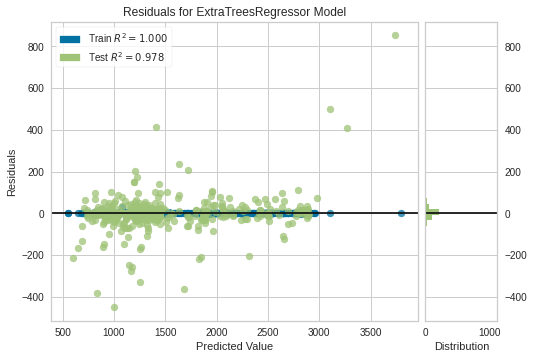

In [21]:
plot_model(et)

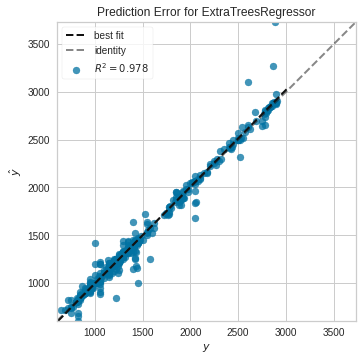

In [22]:
plot_model(et, plot = 'error')

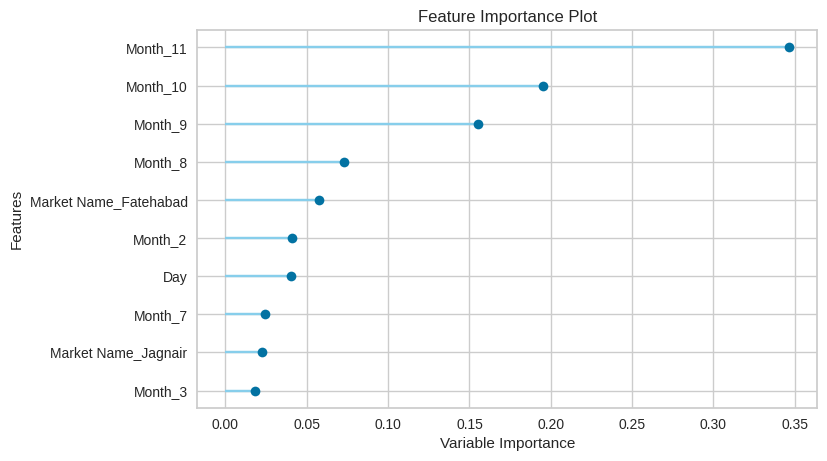

In [23]:
plot_model(et, plot='feature')

In [24]:
predict_model(et)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35.8725,6396.851,79.9803,0.9784,0.0543,0.0256


,Day,Market Name_Achnera,Market Name_Agra,Market Name_Fatehabad,Market Name_Fatehpur Sikri,Market Name_Jagnair,Market Name_Jarar,Market Name_Khairagarh,Market Name_Samsabad,Variety_Desi,Variety_Other,Variety_Potato,Month_1,Month_10,Month_11,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Modal Price (Rs./Quintal),Label
0,3.0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1200.0,1200.0
1,13.0,0,0,0,0,1,0,0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,950.0,935.5
2,17.0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1780.0,1797.2
3,13.0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2050.0,1685.0
4,20.0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2885.0,2885.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,12.0,1,0,0,0,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,1255.5
498,30.0,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100.0,1100.0
499,7.0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2810.0,2809.2
500,14.0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,950.0,974.6
